Akshat Kumar
M.tech CSA 1st Year 2nd Sem
242211003

**Question 1**  Scrape Book Information:


In [12]:
import requests
from bs4 import BeautifulSoup
import csv

# Function to convert rating text to numerical value
def convert_rating(rating_text):
    ratings = {
        'One': 1,
        'Two': 2,
        'Three': 3,
        'Four': 4,
        'Five': 5
    }
    return ratings.get(rating_text, 'No rating')

# Base URL of the website
base_url = 'https://books.toscrape.com/'

# Initialize a list to store book data
books = []

# Start scraping from the first page
page_url = 'catalogue/page-1.html'

while page_url:
    # Fetch the content of the page
    response = requests.get(base_url + page_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all book entries on the page
    book_entries = soup.find_all('article', class_='product_pod')

    for book in book_entries:
        # Extract the title
        title = book.h3.a['title']

        # Extract the price
        price = book.find('p', class_='price_color').text

        # Extract the rating
        rating_class = book.p['class'][1]
        rating = convert_rating(rating_class)

        # Extract the availability
        availability = book.find('p', class_='instock availability').text.strip()

        # Extract the category by navigating to the book's details page
        book_url = base_url + 'catalogue/' + book.h3.a['href']
        book_response = requests.get(book_url)
        book_soup = BeautifulSoup(book_response.text, 'html.parser')

        # Category is in the breadcrumb navigation
        category = book_soup.find('ul', class_='breadcrumb').find_all('li')[2].text.strip()

        # Append the extracted data to the books list
        books.append({
            'Title': title,
            'Price': price,
            'Rating': rating,
            'Availability': availability,
            'Category': category
        })

    # Find the 'next' button to navigate to the next page
    next_button = soup.find('li', class_='next')
    if next_button:
        page_url = 'catalogue/' + next_button.a['href']
    else:
        page_url = None

# Save the data to a CSV file
with open('books.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['Title', 'Price', 'Rating', 'Availability', 'Category'])
    writer.writeheader()
    writer.writerows(books)

print(f'Scraped {len(books)} books and saved to books.csv successfully.')

Scraped 1000 books and saved to books.csv successfully.


**Question 2** Organize the Data

In [13]:
import pandas as pd

def organize_data(csv_filename):
    """Read extracted book data from a CSV file and store it in a structured Pandas DataFrame."""
    df = pd.read_csv(csv_filename)
    print(f"Data successfully loaded from {csv_filename}")
    return df

# Example usage
csv_filename = "books.csv"
df = organize_data(csv_filename)
print(df.head())

Data successfully loaded from books.csv
                                   Title    Price  Rating Availability  \
0                   A Light in the Attic  Â£51.77       3     In stock   
1                     Tipping the Velvet  Â£53.74       1     In stock   
2                             Soumission  Â£50.10       1     In stock   
3                          Sharp Objects  Â£47.82       4     In stock   
4  Sapiens: A Brief History of Humankind  Â£54.23       5     In stock   

             Category  
0              Poetry  
1  Historical Fiction  
2             Fiction  
3             Mystery  
4             History  


**Question 3**  Categorize the Data

In [14]:
import pandas as pd

# Load the scraped data
df = pd.read_csv('books.csv')

# Display the first few rows to verify data
print("Initial Data:")
print(df.head())

# Group by category and count the number of books in each category
category_counts = df['Category'].value_counts()

# Print summary
print("\nBooks Categorized Successfully!")
print("\nCategory-wise Book Count:")
print(category_counts)

Initial Data:
                                   Title    Price  Rating Availability  \
0                   A Light in the Attic  Â£51.77       3     In stock   
1                     Tipping the Velvet  Â£53.74       1     In stock   
2                             Soumission  Â£50.10       1     In stock   
3                          Sharp Objects  Â£47.82       4     In stock   
4  Sapiens: A Brief History of Humankind  Â£54.23       5     In stock   

             Category  
0              Poetry  
1  Historical Fiction  
2             Fiction  
3             Mystery  
4             History  

Books Categorized Successfully!

Category-wise Book Count:
Category
Default               152
Nonfiction            110
Sequential Art         75
Add a comment          67
Fiction                65
Young Adult            54
Fantasy                48
Romance                35
Mystery                32
Food and Drink         30
Childrens              29
Historical Fiction     26
Poetry          

**Question 4** Basic Analysis

In [15]:
import pandas as pd

# Load the scraped book data
df = pd.read_csv('books.csv', encoding='utf-8')

# Clean the price column
df['Price'] = df['Price'].str.replace('[^0-9.]', '', regex=True).astype(float)

# Calculate average price per category
avg_price_per_category = df.groupby('Category')['Price'].mean().round(2)

# Find the most frequent rating
most_frequent_rating = df['Rating'].mode()[0]

# Count books available in each category
category_availability = df[df['Availability'] == 'In stock'].groupby('Category').size()

# Find the category with the highest number of available books
most_available_category = category_availability.idxmax()
max_books_available = category_availability.max()

# Display Results
print("\nAverage Price per Category:")
print(avg_price_per_category)

print("\nMost Frequent Book Rating:", most_frequent_rating, "stars")

print(f"\nCategory with the Most Books Available: {most_available_category} ({max_books_available} books)")


Average Price per Category:
Category
Academic              13.12
Add a comment         35.80
Adult Fiction         15.36
Art                   38.52
Autobiography         37.05
Biography             33.66
Business              32.46
Childrens             32.64
Christian             42.50
Christian Fiction     34.38
Classics              36.55
Contemporary          36.20
Crime                 10.97
Cultural              36.58
Default               34.39
Erotica               19.19
Fantasy               39.59
Fiction               36.07
Food and Drink        31.41
Health                51.45
Historical            22.83
Historical Fiction    33.64
History               37.29
Horror                35.95
Humor                 33.50
Music                 35.64
Mystery               31.72
New Adult             46.38
Nonfiction            34.26
Novels                54.81
Paranormal            15.40
Parenting             37.35
Philosophy            33.56
Poetry                35.97
Politics  

**Question 5** Create a visualization plot showing the number of books per category.

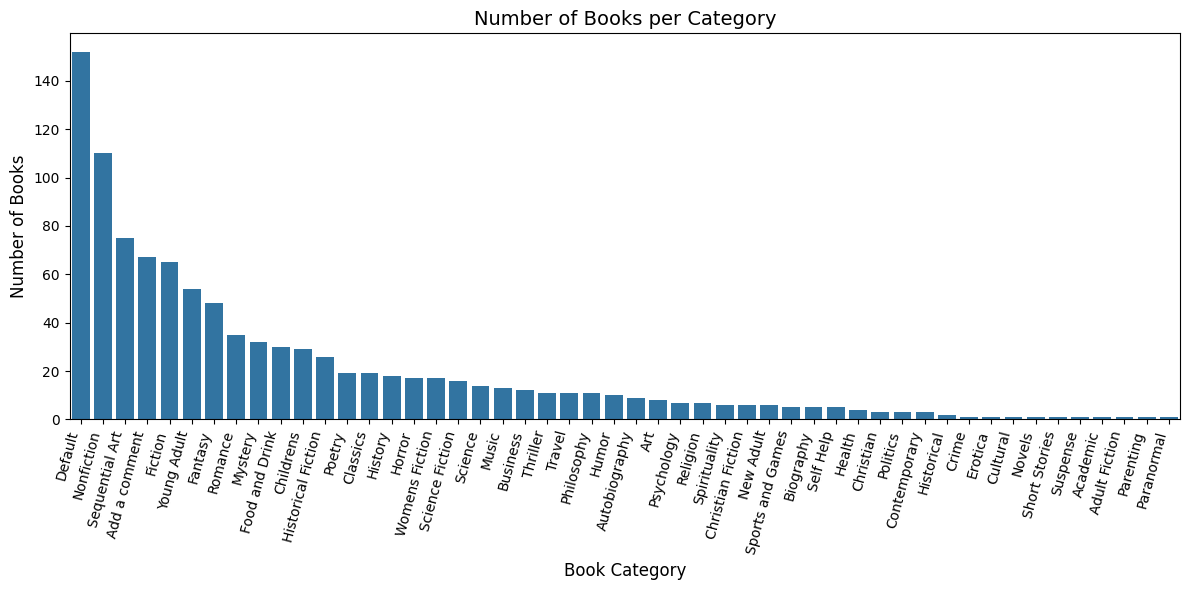

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the scraped book data
df = pd.read_csv('books.csv', encoding='utf-8')

# Count the number of books in each category
category_counts = df['Category'].value_counts()

# Set figure size
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(x=category_counts.index, y=category_counts.values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=75, ha="right")

# Add labels and title
plt.xlabel("Book Category", fontsize=12)
plt.ylabel("Number of Books", fontsize=12)
plt.title("Number of Books per Category", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()